# Evaluate Performance On Datasets For FIR and IIR Filters

In [2]:
import AnalogToDigital as ADC
import AnalogToDigital.deltaSigma as deltaSigma

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
from scipy import signal
import os.path
import h5py

import AnalogToDigital as ADC

from __future__ import division
from deltasigma import *

%load_ext autoreload
%autoreload 2

/opt/anaconda/lib/python3.6/site-packages/deltasigma/__init__.py:919: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/anaconda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/anaconda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/anaconda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/opt/anaconda/lib/p

In file included from /opt/anaconda/lib/python3.6/site-packages/numpy/core/include/numpy/ndarraytypes.h:1818:0,
                 from /opt/anaconda/lib/python3.6/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /opt/anaconda/lib/python3.6/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /home/rakeusch/.pyxbld/temp.linux-x86_64-3.6/pyrex/deltasigma/_simulateDSM_cblas.c:567:
/opt/anaconda/lib/python3.6/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^
/home/rakeusch/.pyxbld/temp.linux-x86_64-3.6/pyrex/deltasigma/_simulateDSM_cblas.c:570:19: fatal error: cblas.h: No such file or directory
compilation terminated.
In file included from /opt/anaconda/lib/python3.6/site-packages/numpy/core/include/numpy/ndarraytypes.h:1818:0,
    

## List Possible Datasets

In [3]:
devices = {}
filename = 'dataStore.hdf5'
with h5py.File(filename,'r') as f:
    for g in f.keys():
        ds = []
        print("For Device: %s" % g)
        for a in f[g]:
            print("DataSet: %s" % os.path.join(a))
            ds.append(a)
        devices[g] = ds

For Device: MASH_1_1_1
DataSet: BandLimitedNoise_std_0.000000_0
DataSet: BandLimitedNoise_std_0.000000_1
DataSet: BandLimitedNoise_std_0.000000_2
DataSet: BandLimitedNoise_std_0.000000_3
DataSet: BandLimitedNoise_std_0.000000_4
DataSet: BandLimitedNoise_std_0.000000_5
DataSet: BandLimitedNoise_std_0.000000_6
DataSet: BandLimitedNoise_std_0.000000_7
DataSet: BandLimitedNoise_std_0.000000_8
DataSet: BandLimitedNoise_std_0.000000_9
DataSet: BandLimitedNoise_std_0.001001_0
DataSet: BandLimitedNoise_std_0.001001_1
DataSet: BandLimitedNoise_std_0.001001_2
DataSet: BandLimitedNoise_std_0.001001_3
DataSet: BandLimitedNoise_std_0.001001_4
DataSet: BandLimitedNoise_std_0.001001_5
DataSet: BandLimitedNoise_std_0.001001_6
DataSet: BandLimitedNoise_std_0.001001_7
DataSet: BandLimitedNoise_std_0.001001_8
DataSet: BandLimitedNoise_std_0.001001_9
DataSet: BandLimitedNoise_std_0.002002_0
DataSet: BandLimitedNoise_std_0.002002_1
DataSet: BandLimitedNoise_std_0.002002_2
DataSet: BandLimitedNoise_std_0.00

DataSet: BandLimitedNoise_std_0.346346_0
DataSet: BandLimitedNoise_std_0.346346_1
DataSet: BandLimitedNoise_std_0.346346_2
DataSet: BandLimitedNoise_std_0.346346_3
DataSet: BandLimitedNoise_std_0.346346_4
DataSet: BandLimitedNoise_std_0.346346_5
DataSet: BandLimitedNoise_std_0.346346_6
DataSet: BandLimitedNoise_std_0.346346_7
DataSet: BandLimitedNoise_std_0.346346_8
DataSet: BandLimitedNoise_std_0.346346_9
DataSet: BandLimitedNoise_std_0.347347_0
DataSet: BandLimitedNoise_std_0.347347_1
DataSet: BandLimitedNoise_std_0.347347_2
DataSet: BandLimitedNoise_std_0.347347_3
DataSet: BandLimitedNoise_std_0.347347_4
DataSet: BandLimitedNoise_std_0.347347_5
DataSet: BandLimitedNoise_std_0.347347_6
DataSet: BandLimitedNoise_std_0.347347_7
DataSet: BandLimitedNoise_std_0.347347_8
DataSet: BandLimitedNoise_std_0.347347_9
DataSet: BandLimitedNoise_std_0.348348_0
DataSet: BandLimitedNoise_std_0.348348_1
DataSet: BandLimitedNoise_std_0.348348_2
DataSet: BandLimitedNoise_std_0.348348_3
DataSet: BandLim

DataSet: BandLimitedNoise_std_0.669670_3
DataSet: BandLimitedNoise_std_0.669670_4
DataSet: BandLimitedNoise_std_0.669670_5
DataSet: BandLimitedNoise_std_0.669670_6
DataSet: BandLimitedNoise_std_0.669670_7
DataSet: BandLimitedNoise_std_0.669670_8
DataSet: BandLimitedNoise_std_0.669670_9
DataSet: BandLimitedNoise_std_0.670671_0
DataSet: BandLimitedNoise_std_0.670671_1
DataSet: BandLimitedNoise_std_0.670671_2
DataSet: BandLimitedNoise_std_0.670671_3
DataSet: BandLimitedNoise_std_0.670671_4
DataSet: BandLimitedNoise_std_0.670671_5
DataSet: BandLimitedNoise_std_0.670671_6
DataSet: BandLimitedNoise_std_0.670671_7
DataSet: BandLimitedNoise_std_0.670671_8
DataSet: BandLimitedNoise_std_0.670671_9
DataSet: BandLimitedNoise_std_0.671672_0
DataSet: BandLimitedNoise_std_0.671672_1
DataSet: BandLimitedNoise_std_0.671672_2
DataSet: BandLimitedNoise_std_0.671672_3
DataSet: BandLimitedNoise_std_0.671672_4
DataSet: BandLimitedNoise_std_0.671672_5
DataSet: BandLimitedNoise_std_0.671672_6
DataSet: BandLim

DataSet: Sinusodial_amp_freq_phase_0.000000_0.000743_4.798219
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000751_0.778304
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000751_1.882259
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000751_1.921561
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000751_2.174702
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000751_3.504720
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000751_3.681724
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000751_4.194008
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000751_4.783449
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000751_5.398221
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000751_5.463004
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000759_1.157587
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000759_2.454940
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000759_2.825599
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000759_3.363013
DataSet: Sinusodial_amp_freq_phase_0.000000_0.000759_3.368775
DataSet:

DataSet: Sinusodial_amp_freq_phase_0.000000_0.003871_5.386158
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003879_0.459292
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003879_0.780483
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003879_0.956073
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003879_1.161628
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003879_1.227291
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003879_1.265433
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003879_2.742209
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003879_3.430801
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003879_4.120745
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003879_4.394941
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003887_0.207151
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003887_0.755009
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003887_0.871520
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003887_1.670221
DataSet: Sinusodial_amp_freq_phase_0.000000_0.003887_2.881053
DataSet:

DataSet: Sinusodial_amp_freq_phase_0.000000_0.007390_5.728171
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007390_6.099618
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007398_0.573216
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007398_0.878751
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007398_1.336362
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007398_1.595236
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007398_2.426010
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007398_2.460572
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007398_3.156037
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007398_3.966408
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007398_5.438580
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007398_5.811954
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007406_1.606954
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007406_2.155537
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007406_2.614459
DataSet: Sinusodial_amp_freq_phase_0.000000_0.007406_2.857735
DataSet:

DataSet: Sinusodial_amp_freq_phase_0.001001_0.003089_6.100300
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003089_6.139468
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003097_0.157638
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003097_0.252755
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003097_0.316018
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003097_0.825602
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003097_1.563140
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003097_2.568947
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003097_3.577875
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003097_4.284552
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003097_4.915371
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003097_5.666273
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003105_0.466548
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003105_1.811397
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003105_3.602918
DataSet: Sinusodial_amp_freq_phase_0.001001_0.003105_4.073119
DataSet:

## Configuration

In [4]:
device = 'MASH_1_1_1'
deterministic = True
if deterministic:
    dataset = 'BandLimitedNoise_std_0.115115_1'
else:
    randomIndex = np.random.choice(len(devices[device]))
    dataset = devices[device][randomIndex]
print("Dataset: %s" % (dataset))
with h5py.File(filename,'r') as f:        
    OSR = f[device].attrs['OSR']
    order_mash_block = f[device].attrs['order_mash_block']
    order = np.sum(order_mash_block)

    print(os.path.join(device, dataset))
    data = f[os.path.join(device, dataset)]
    y = np.array(data['y'])
    y_hat = np.array(data['y_hat'])

    window = int(3/8. * y.size)

Dataset: BandLimitedNoise_std_0.115115_1
MASH_1_1_1/BandLimitedNoise_std_0.115115_1


### Theoretical Expectations

In [6]:
DR = 1 * 6.02 + 1.76 + 10 * np.log10(2 * order + 1) - 20 * order * np.log10(np.pi) + 10 * (2 * order + 1) * np.log10(OSR)
ENOB = lambda x : (x - 1.76) / 6.02
SIGNAL_POWER = 10 * np.log10(np.sum(np.abs(y)**2)/y.size)
SNR = SIGNAL_POWER + DR
print('Expected MSE: %f dB\nENOB: %s bits' % (-DR, ENOB(DR)))
print('Signal Power: %f dB\nEffective SNR: %f dB' % (SIGNAL_POWER, SNR))

Expected MSE: -91.762487 dB
ENOB: 14.950579156293681 bits
Signal Power: -30.731622 dB
Effective SNR: 61.030865 dB


## Filter Design

In [253]:
f3dB = 1./(2. * OSR) 
# b, a = signal.iirfilter(16, f3dB, btype='lowpass', analog=False, ftype='butter')
N = 100
diff = f3dB * 0.3
f = [0, f3dB, f3dB + diff, 1]
dr = 10**(-DR/20.)
amp = [1, 1, dr, 0]
fir = signal.firwin2(N, f, amp)

## Filter

<IPython.core.display.Javascript object>


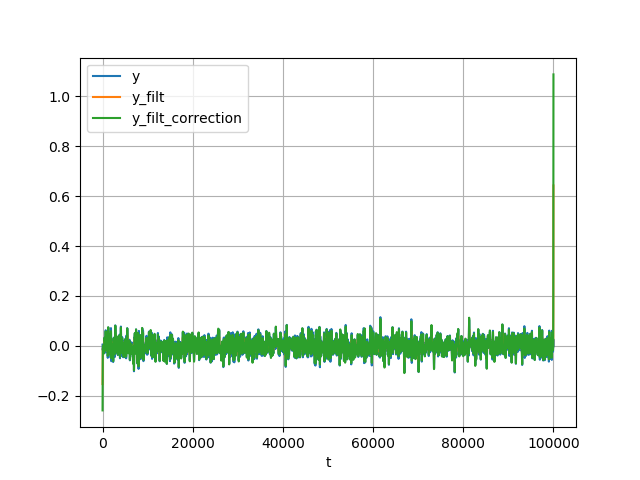

In [254]:
y_filt = signal.filtfilt(fir, [1], y_hat)

correction = np.dot(y[window:-window], y_filt[window:-window]) / (np.linalg.norm(y_filt[window:-window])**2)

y_filt_correction = y_filt * correction

plt.figure()
plt.grid(True)
plt.xlabel('t')
plt.plot(y, label="y")
plt.plot(y_filt, label="y_filt")
plt.plot(y_filt_correction, label="y_filt_correction")
plt.legend()

## Error Measures

<IPython.core.display.Javascript object>


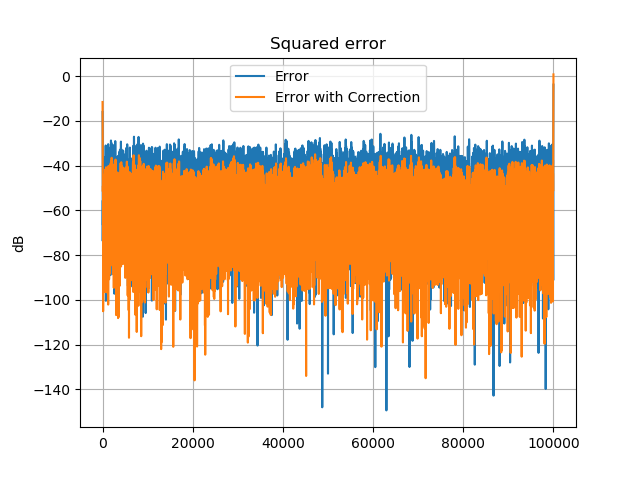

MSE is -37.672221 dB
MSE with Correction is -45.808051 dB


In [255]:
error = y - y_filt
error_correction = y - y_filt_correction

plt.figure()
plt.plot(20 * np.log10(np.abs(error)), label="Error")
plt.plot(20 * np.log10(np.abs(error_correction)), label="Error with Correction")
plt.grid(True)
plt.legend()
plt.ylabel("dB")
plt.title("Squared error")

length = y[window:-window].size

mse = np.sum(np.abs(error[window:-window])**2)
mse_correction = np.sum(np.abs(error_correction[window:-window])**2)
mse /= length
mse_correction /= length

MSE = 10 * np.log10(mse)
MSE_CORRECTION = 10 * np.log10(mse_correction)

print("MSE is %f dB" % (10 * np.log10(mse)))
print("MSE with Correction is %f dB" % (10 * np.log10(mse_correction)))

## Power Spectral Density

<IPython.core.display.Javascript object>


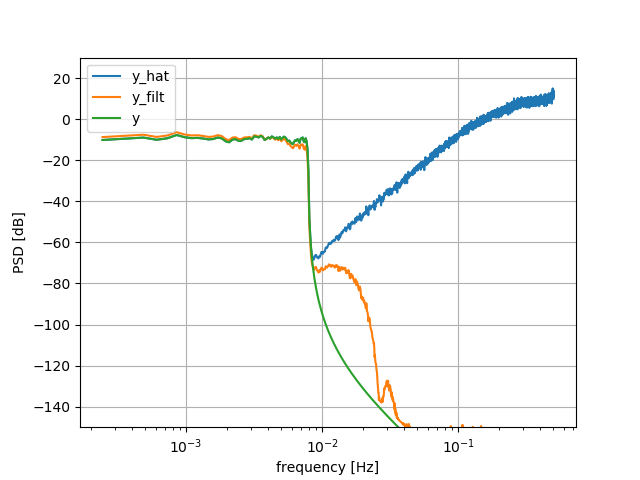

In [256]:
f, psd_y = signal.welch(y, 1, nperseg=1024 * 8)
f, psd_y_hat = signal.welch(y_hat, 1, nperseg=1024 * 8)
f, psd_y_filt = signal.welch(y_filt_correction, 1, nperseg=1024 * 8)

window2 = 2

plt.figure()
plt.grid(True)
plt.semilogx(f[window2:], 10 * np.log10(psd_y_hat[window2:]), label='y_hat')
plt.semilogx(f[window2:], 10 * np.log10(psd_y_filt[window2:]), label='y_filt')
plt.semilogx(f[window2:], 10 * np.log10(psd_y[window2:]), label='y')
plt.ylim([-150, 30])
# plt.xlim([0,0.1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB]')
plt.legend()

## Summary

In [257]:
print('Expected MSE: %.3f dB, ENOB %.3f bits, SNR %.3f dB' % (-DR, ENOB(DR), SIGNAL_POWER + DR))
print("MSE is %.3f dB, ENOB %.3f bits, SNR %.3f dB" % (MSE, ENOB(-MSE), SIGNAL_POWER - MSE))
print("MSE with Correction is %.3f dB, ENOB %.3f bits, SNR %.3f dB" % (MSE_CORRECTION, ENOB(-MSE_CORRECTION), SIGNAL_POWER - MSE_CORRECTION))

Expected MSE: -91.762 dB, ENOB 14.951 bits, SNR 61.031 dB
MSE is -37.672 dB, ENOB 5.965 bits, SNR 6.941 dB
MSE with Correction is -45.808 dB, ENOB 7.317 bits, SNR 15.076 dB
